<a href="https://colab.research.google.com/github/GuhNasc/Data-Science/blob/main/Amazon_Best_Selling_Books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Best Sellings da Amazon

A [Amazon]('https://www.amazon.com.br/') é a maior empresa do mundo na venda de eBooks e atualmente oferece diversos produtos e serviços : 

* `AmazonPrime`
* `Amazon Web Services`
* `Amazon Drives`
* `Alexa`

A Amazon é, atualmente, a marca mais valiosa do mundo, ultrapassando gigantes como Apple e Google. De acordo com o ranking **BrandZ**, desenvolvido pela agência de pesquisa de marketing Kantar, empresa vale 315,5 bilhões de dólares , o equivalente a mais de R$ 1,2 trilhão, e subiu duas posições em relação ao ano passado. Em pouco mais de duas décadas de existência, a marca mudou o cenário global do varejo online, atuando em diversas áreas.

**Neste notebook , iremos analisar os dados sobre Top Selling Book de 2009 até 2019**

## Obtenção dos dados

Todos os dados usados aqui foram obtidos através do **Kaggle**



In [23]:
# importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline

In [24]:
# Importando o arquivo para um DataFrame
df = pd.read_csv('/content/bestsellers with categories.csv')

In [25]:
# Verificando as primeiras entradas
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


## Análise dos dados

Dicionário das váriaveis:

* `Name` - Nome do livro
* `Author` - Autor do livro
* `User Rating` - Nota dada pelo usuário
* `Reviews` - Numero de reviews de cada livro.
* `Price` - Preço dos livros em dólares
* `Year` - Ano que o livro foi publicado
* `Genre` - Genêro do Livro


### Informações gerais do dataset

#### 1-) Quantas Entradas e outliers há no dataset ?

In [26]:
## Verificando quantas entradas no dataset 
len(df)

550

In [27]:
## Verificando se há algum valor nulo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


Como analisamos , o dataset contém 550 linhas (entradas) , também podemos verificar que todas as váriveis tem as 550 linhas , logo **NÃO HÁ VALORES NULOS**

#### 2-) Qual a distribuição das variáveis numéricas ?

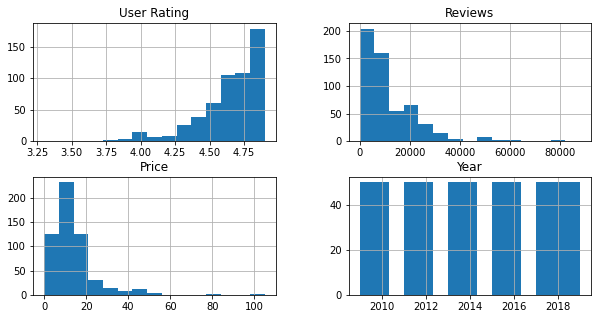

In [28]:
# Plotando histograma das váriaveis numéricas
df.hist(bins = 15, figsize=(10,5));

#### 3-) Qual o genêro com a melhor nota ?

In [31]:
## Agrupando os livros pelo genero
px.bar(df,x='Year',y='User Rating',  color='Genre',barmode= 'group', title="Classificação do usuário por ano e por gênero")

De acordo com o gráfico de barras , o gênero de ficção cresce cada vez mais a cada ano 

#### 4-) Quais os top 10 livros com as melhores notas ? 

In [32]:
# Verificando os livros mais bem avaliados
df[['User Rating', 'Author', 'Name']].groupby(by=['Author','Name']).mean().sort_values(by=['User Rating'],ascending=False).head(10)  

,,User Rating
Author,Name,
J. K. Rowling,"Harry Potter and the Goblet of Fire: The Illustrated Edition (Harry Potter, Book 4) (4)",4.9
Dav Pilkey,Dog Man: A Tale of Two Kitties: From the Creator of Captain Underpants (Dog Man #3),4.9
J.K. Rowling,"Harry Potter and the Sorcerer's Stone: The Illustrated Edition (Harry Potter, Book 1)",4.9
Brandon Stanton,Humans of New York : Stories,4.9
J.K. Rowling,"Harry Potter and the Prisoner of Azkaban: The Illustrated Edition (Harry Potter, Book 3)",4.9
Bill Martin Jr.,"Brown Bear, Brown Bear, What Do You See?",4.9
Emily Winfield Martin,The Wonderful Things You Will Be,4.9
J.K. Rowling,"Harry Potter and the Chamber of Secrets: The Illustrated Edition (Harry Potter, Book 2)",4.9
Rush Limbaugh,Rush Revere and the Brave Pilgrims: Time-Travel Adventures with Exceptional Americans (1),4.9


#### 5-) Quais os top 10 Autores com as melhores notas ?

In [33]:
# Verificando os autores mais bem avaliados
df[['User Rating','Author']].groupby(by=['Author']).mean().sort_values(by=['User Rating'],ascending=False).head(10)

,User Rating
Author,
Jill Twiss,4.9
Nathan W. Pyle,4.9
Chip Gaines,4.9
Rush Limbaugh,4.9
Bill Martin Jr.,4.9
Emily Winfield Martin,4.9
Pete Souza,4.9
Patrick Thorpe,4.9
Lin-Manuel Miranda,4.9


Podemos notar que os livros do J.K. Rowling são os mais bem avaliados , porém o mesmo não está entre os 10 melhores autores avaliados

#### 6-) Qual a correlação entre as variáveis ?

In [34]:
# Criando uma matriz de correlação
corr = df[['Price','Year','Reviews','User Rating']].corr()

display(corr)

,Price,Year,Reviews,User Rating
Price,1.000000,-0.153979,-0.109182,-0.133086
Year,-0.153979,1.000000,0.263560,0.242383
Reviews,-0.109182,0.263560,1.000000,-0.001729
User Rating,-0.133086,0.242383,-0.001729,1.000000


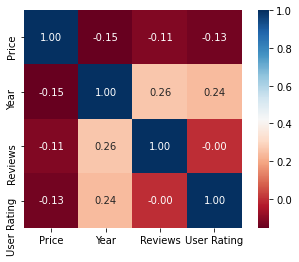

In [35]:
sns.heatmap(corr ,cmap='RdBu', fmt='.2f', square='white', linecolor='Blue', annot=True);

#### 7-) O ano do livro influência no preço ?

In [36]:
# Agrupando os livros por ano e verificando a média do valor de cada ano
df.groupby('Year')['Price'].mean()

Year
2009    15.40
2010    13.48
2011    15.10
2012    15.30
2013    14.60
2014    14.64
2015    10.42
2016    13.18
2017    11.38
2018    10.52
2019    10.08
Name: Price, dtype: float64

As médias dos valores de cada ano são bem proximas , logo podemos concluir que o ano do livro não influência muito no preço

#### 8-) O genêro do Livro influência no preço ?

In [38]:
# Agrupando os livros por genêro e verificando a média do valor de cada genêro
df.groupby('Genre')['Price'].mean().round(2)

Genre
Fiction        10.85
Non Fiction    14.84
Name: Price, dtype: float64

Podemos concluir que os livro sem ficção são mais caros , isso mostra o porquê esse genêro tem notas melhores

#### 9-) A nota do livro influência no preço ?

In [37]:
df.groupby('User Rating')['Price'].mean().round(2)

User Rating
3.3    12.00
3.6    19.00
3.8    14.00
3.9    17.67
4.0    14.64
4.1    11.67
4.2    11.62
4.3    13.28
4.4    14.45
4.5    20.93
4.6    12.10
4.7    12.99
4.8    10.87
4.9    10.29
Name: Price, dtype: float64

Com essa pequena analise , verificamos que os livros com maiores notas não são mais caros que os livros com menos nota , porém todos os livros ficam em uma média de preço bem parecida. 



## Conclusões 

Por fim , podemos concluir que os livros do genêro ficção são os mais bem avaliados pelo público e vai crescendo a cada ano. 

Os livros do J. K. Rowling são os melhores avaliados por causa da criação da saga **Harry Potter**. Porém o mesmo não está entre os 10 autores mais avaliados. 

A média do preço dos livros de ficção são mais baratos do que os livros de gênero sem ficção entretanto o preço não tem muita altação dependendo da nota. 
